# Notebook for Testing and Running a Fast Example

In [7]:
%matplotlib inline
import os
import numpy as np

## Generation Test

Run the following cells. If the code runs successfully, initial_test.hdf5 file will be added to the current directory. It will be an SNR gridded dataset with total mass as the x-value and redshift as the y value. It will use the Classic LISA and Proposed LISA curves for the SNR calculation and the Hils-Bender estimation (Bender & Hils 1997) by Hiscock et al. 2000 for the white dwarf noise (provided in GitHub). This will verify that the generation code (``generate_contour_data.py``) and, especially, ``pyphenomd.py`` runs correctly. 

Please refer to and cite "Evaluating Black Hole Detectability with LISA" (arXiv:1807.02511) for usage of this tool and an example of its application. The codes here are shared under the GNU license. 

In [5]:
os.chdir('/Users/michaelkatz/Documents/Research/PythonCodes/BOWIE_analysis/snr_calculator_folder/')
from snr_calculator.generate_contour_data import generate_contour_data
from snr_calculator.genconutils.forminput import MainContainer as GenInput
os.chdir('/Users/michaelkatz/Documents/Research/PythonCodes/BOWIE_analysis/notebooks/')

In [10]:
test_generation = GenInput(print_input=True)

# main inputs
test_generation.set_signal_type(["all", "ins", "mrg", "rd"])
test_generation.set_generation_type(num_processors=-1, num_splits=500, verbose=2)
test_generation.set_wd_noise(True)

# output_info
test_generation.working_directory('.')
test_generation.set_output_file('initial_test.hdf5')
test_generation.set_x_col_name('M_s')
test_generation.set_y_col_name('z')

# add a note about white dwarf noise
test_generation.added_note("Hils-Bender white dwarf noise.")

# input sensitivity info
test_generation.add_noise_curve('PL', noise_type='ASD')
test_generation.add_noise_curve('CL', noise_type='ASD')

# generation info
test_generation.set_x_grid_info(1e2, 1e10, 50, 'log', 'total_mass', 'SolarMasses')
test_generation.set_y_grid_info(1e-2, 1e2, 50, 'log', 'redshift', 'None')

test_generation.add_fixed_parameter(1, 0.2, 'mass_ratio', 'None')
test_generation.add_fixed_parameter(2, 0.8, 'spin_1', 'None')
test_generation.add_fixed_parameter(3, 0.8, 'spin_2', 'None')
test_generation.add_fixed_parameter(4, 1.0, 'start_time', 'Years')
test_generation.add_fixed_parameter(5, 0.0, 'end_time', 'Years')

# add LISA averaging factor
test_generation.set_snr_factor(np.sqrt(2.*16./5.))


generate_contour_data(test_generation.return_overall_dictionary())

{'output_info': {'output_file_name': 'initial_test.hdf5', 'x_col_name': 'M_s', 'y_col_name': 'z', 'output_file_type': 'hdf5'}, 'general': {'add_wd_noise': 'True', 'verbose': 2, 'signal_type': ['all', 'ins', 'mrg', 'rd'], 'num_processors': -1, 'num_splits': 500, 'WORKING_DIRECTORY': '.'}, 'generate_info': {'num_x': 50, 'x_low': 100.0, 'par_1_unit': 'None', 'par_3_name': 'spin_2', 'par_1_name': 'mass_ratio', 'xval_unit': 'SolarMasses', 'num_y': 50, 'par_5_name': 'end_time', 'par_2_name': 'spin_1', 'prefactor': 2.5298221281347035, 'yscale': 'log', 'fixed_parameter_3': 0.8, 'par_4_name': 'start_time', 'fixed_parameter_5': 0.0, 'par_3_unit': 'None', 'x_high': 10000000000.0, 'xscale': 'log', 'yval_unit': 'None', 'par_4_unit': 'Years', 'y_low': 0.01, 'fixed_parameter_2': 0.8, 'fixed_parameter_1': 0.2, 'y_high': 100.0, 'fixed_parameter_4': 1.0, 'yval_name': 'redshift', 'par_5_unit': 'Years', 'xval_name': 'total_mass', 'par_2_unit': 'None'}, 'input_info': {'added_note': 'Hils-Bender white dwarf

## Make Plot Test

Run the following cells to test each plot from make plot. It will produce a Waterfall, Ratio, and Horizon plot. 

In [11]:
os.chdir('/Users/michaelkatz/Documents/Research/PythonCodes/BOWIE_analysis/')
from bowie_makeplot.make_plot import plot_main
from bowie_makeplot.plotutils.forminput import MainContainer as PlotInput
os.chdir('/Users/michaelkatz/Documents/Research/PythonCodes/BOWIE_analysis/notebooks/')

{'plot_info': {'0': {'type': 'Waterfall', 'file': [{'label': 'PL_wd_all'}]}, '2': {'type': 'Horizon', 'file': [{'label': 'PL_wd_all'}, {'label': 'CL_wd_all'}]}, '1': {'type': 'Ratio', 'control': {'label': 'CL_wd_all'}, 'file': [{'label': 'PL_wd_all'}]}}, 'general': {'x_column_label': 'M_s', 'file_name': 'initial_test.hdf5', 'xscale': 'log', 'figure_width': 13.0, 'num_rows': 3, 'sharey': True, 'y_tick_label_fontsize': 16, 'y_column_label': 'z', 'WORKING_DIRECTORY': '.', 'dx': 1.0, 'num_cols': 1, 'figure_height': 10.0, 'sharex': True, 'fig_x_label': 'Total Mass ($M_\\odot$)', 'fig_y_label': 'Redshift', 'yscale': 'lin', 'x_tick_label_fontsize': 16, 'ylims': [0.0, 20.0], 'dy': 4.0, 'xlims': [2.0, 10.0]}}


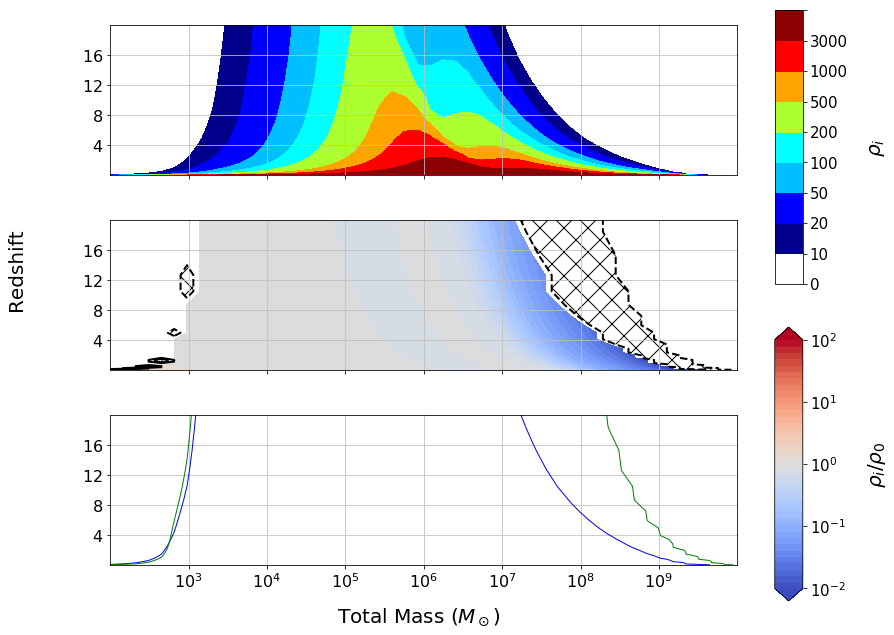

In [15]:
test_plot = PlotInput(3, 1, print_input=True)

# set general info
test_plot.working_directory(".")
test_plot.file_column_labels(xlabel='M_s', ylabel='z')
test_plot.set_fig_size(13.0, 10.0)
test_plot.set_fig_xlims([2.0, 10.0], 1.0, 'log', fontsize=16)
test_plot.set_fig_ylims([0.0, 20.0], 4.0, 'lin', fontsize=16)
test_plot.set_fig_labels(xlabel=r"Total Mass ($M_\odot$)", ylabel="Redshift")
test_plot.file_name("initial_test.hdf5")

# set plot_info

for i, plot_type in enumerate(['Waterfall', 'Ratio', 'Horizon']):
    test_plot.ax[i].set_type(plot_type)
    
for i in np.arange(3):
    test_plot.ax[i].add_dataset(label="PL_wd_all")
    
test_plot.ax[1].add_dataset(label="CL_wd_all", control=True)

test_plot.ax[2].add_dataset(label="CL_wd_all")

plot_main(test_plot.return_overall_dictionary())